## Разложения ошибки на смещение и разброс<a class='anchor' id='bias_variance'>

<center>Ошибка на новых данных = Шум + Смещение + Разброс, где</center>

ШУМ - ошибка лучшей модели a(x)

СМЕЩЕНИЕ (bias, отклонение) - разница между средним значением предсказания и истинным значением. Чем больше значение, тем сильнее наша модель упрощает данные, что ведет к большой ошибки на обучающих и тестовых данных (недообучение).

РАЗБРОС (variance, дисперсия) - вариативность значений предсказаний модели. Чем больше модель обращает внимания на данные, тем больше она обращает внимание и на помехи, и шумы, значит модель меньше склонна обобщать данные, исключая шум из них. Чем больше значение, тем лучше модель отрабатывает на обучающем наборе данных, но отрабатывает хуже на тестовом.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.image as img
from sklearn.metrics import r2_score

import numpy as np

In [2]:
target = './target.jpg'

target_img = img.imread(target)


def plot_target(x, y):
    plt.figure(figsize=(10, 8))
    plt.imshow(target_img, extent=[-1, 1, -1, 1])
    plt.scatter(x, y, s=100, c='r')
    plt.show()

In [3]:
def generate_dots(bias='low', variance='low', n=10):
    assert bias in ['low', 'high'], 'Неправильное смещение'
    assert variance in ['low', 'high'], 'Неправильный разброс'
    
    if bias == 'low':
        bias_value = 0
    elif bias == 'high':
        bias_value = 0.3
    
    if variance == 'low':
        variance_value = 0.1
    elif variance == 'high':
        variance_value = 0.3
        
    x = np.random.uniform(-variance_value, variance_value, n) + bias_value
    y = np.random.uniform(-variance_value, variance_value, n) + bias_value
        
    
    return x, y

### Этапы жизни модели

*Недообучение*

Большое отклонение, маленький разброс.

In [4]:
x, y = generate_dots(bias='high', variance='low', n=10)

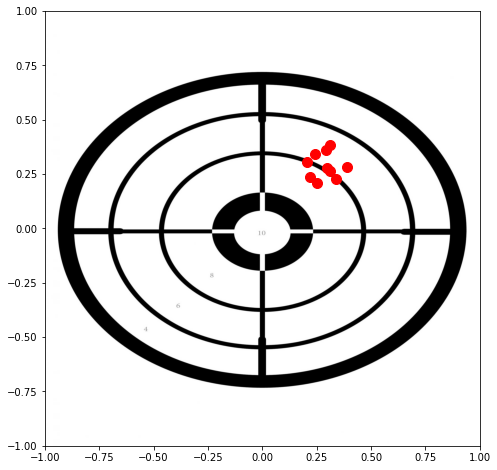

In [5]:
plot_target(x, y)

*Недообучение*

Большое отклонение, большой разброс. Калибровка модели.

In [6]:
x, y = generate_dots(bias='high', variance='high', n=10)

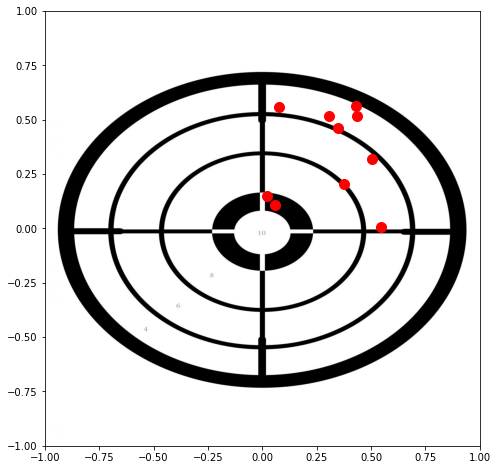

In [7]:
plot_target(x, y)

*Идеально*

Маленькое отклонение, маленький разброс. Модель обучена без шумов.

In [8]:
x, y = generate_dots(bias='low', variance='low', n=10)

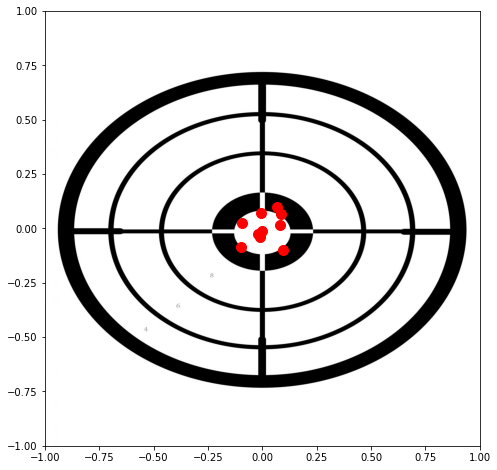

In [9]:
plot_target(x, y)

*Переобучение*

Маленькое отклонение, большой разброс. Модель обучилась на шумах.

In [10]:
x, y = generate_dots(bias='low', variance='high', n=10)

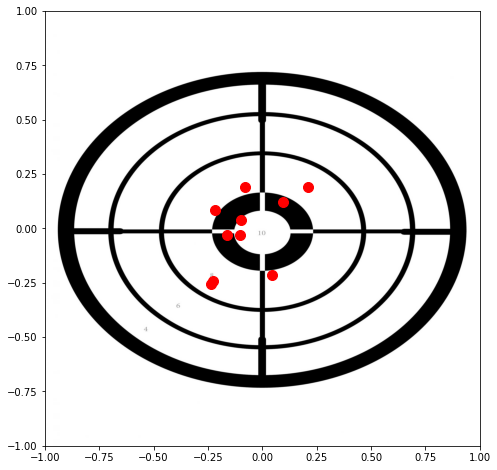

In [11]:
plot_target(x, y)

## Дилемма
Чем сложнее модель, тем более сложные закономерности она улавливает, значит отклонение становится меньше, но модель может зацепиться за ненужный шум, засчет чего увеличивается разброс.

In [12]:
def f(x):
    return 2 * np.sin(x) ** 7

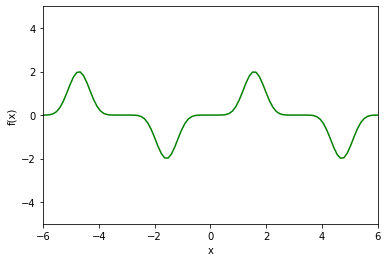

In [13]:
left_x, right_x = -6, 6
dots = np.linspace(left_x, right_x, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5, 5)
plt.xlim(left_x, right_x)

plt.plot(dots, f(dots), color='g');

In [14]:
np.random.seed(3)
size = 100

x_data = np.random.uniform(left_x, right_x, size)
f_data = f(x_data) + np.random.uniform(-1, 1, size)

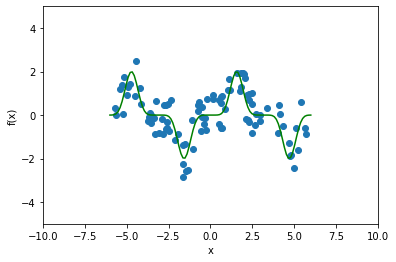

In [15]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5, 5)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_data, f_data);

In [16]:
from sklearn.tree import DecisionTreeRegressor

num = 15
regressors = []
for i in range(num):
    # создадим модель
    regressor = DecisionTreeRegressor(max_depth=i+1)

    # обучим ее
    regressor.fit(np.reshape(x_data, (-1, 1)), f_data)
    regressors.append(regressor)

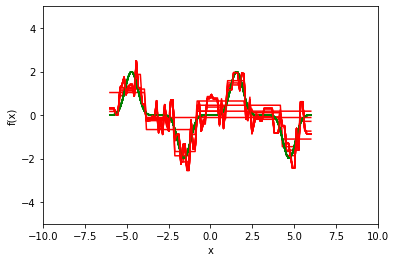

In [17]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5, 5)
plt.xlim(-10, 10)

biases = []
variances = []

r2_scores_train = []
r2_scores_test = []

for i in range(num):
    plt.plot(dots, f(dots), color='g')
    prediction_train = regressors[i].predict(np.reshape(x_data, (-1, 1)))

    bias = ((prediction_train - f_data) ** 2).mean()
    biases.append(bias)

    prediction_test = regressors[i].predict(np.reshape(dots, (-1, 1)))
    plt.plot(dots, prediction_test, color='r')
    
    var = np.var(prediction_test)
    variances.append(var)
    
    r2_scores_train.append(r2_score(f_data, prediction_train))
    r2_scores_test.append(r2_score(f(dots), prediction_test))

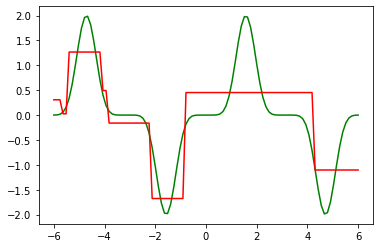

In [18]:
plt.plot(dots, f(dots), color='g')

prediction_test = regressors[2].predict(np.reshape(dots, (-1, 1)))
plt.plot(dots, prediction_test, color='r');    

In [19]:
variances = np.array(variances)
variances

array([0.19504104, 0.30661768, 0.76471432, 0.82870976, 0.9915404 ,
       1.03397118, 1.13438819, 1.15239838, 1.17090052, 1.166911  ,
       1.16598755, 1.16699363, 1.1674767 , 1.1674073 , 1.16699591])

In [20]:
biases = np.array(biases)
biases

array([1.03241181e+00, 8.73984289e-01, 5.15516516e-01, 4.23305702e-01,
       2.23308106e-01, 1.68159423e-01, 1.08598704e-01, 6.12289683e-02,
       3.11239470e-02, 8.86122036e-03, 1.34962355e-03, 1.13086452e-03,
       7.92867970e-04, 2.88361841e-04, 0.00000000e+00])

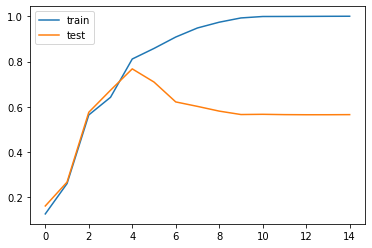

In [21]:
plt.plot(range(num), r2_scores_train, label='train')
plt.plot(range(num), r2_scores_test, label='test')
plt.legend();

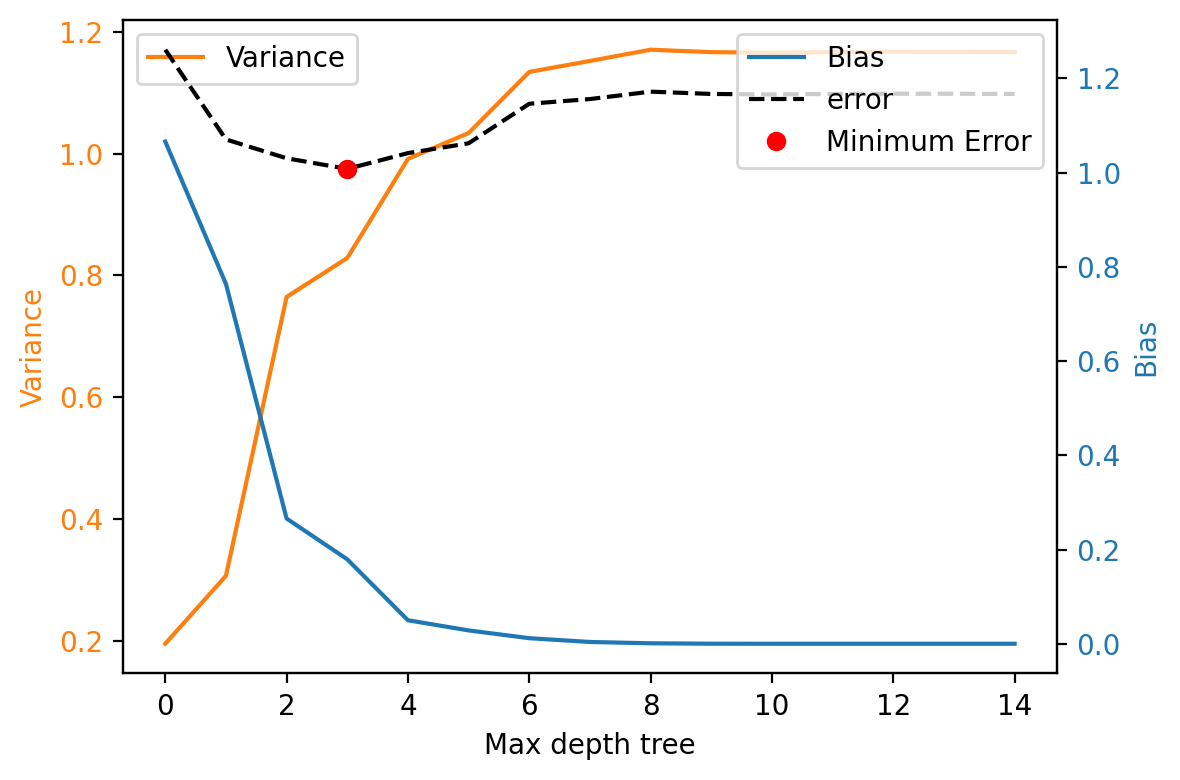

In [22]:
fig, ax1 = plt.subplots(dpi=200)

color = 'tab:orange'
ax1.set_xlabel('Max depth tree')
ax1.set_ylabel('Variance', color=color)
ax1.plot(range(num), variances, color=color, label='Variance')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Bias', color=color)
ax2.plot(range(num), biases ** 2, color=color,  label='Bias')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

error = biases ** 2 + variances
min_ind = np.argmin(error)
plt.plot(range(num), error, 'k--', label = 'error')
plt.plot(range(num)[min_ind], error[min_ind], 'ro', label= 'Minimum Error')
leg = ax2.legend(loc='upper right')
leg = ax1.legend(loc='upper left')

[Статья](https://habr.com/ru/post/420591/) про bias и variance.

Доля ошибок алгоритма на тренировочной выборке - смещение (bias).

Насколько хуже алгоритм работает на валидационной (или тестовой) выборке, чем на тренировочной - разброс (variance) алгоритма.

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

import numpy as np

In [24]:
def f(x):
    return 6 - 13 * x - 5 * x ** 2 - 4 * x ** 3

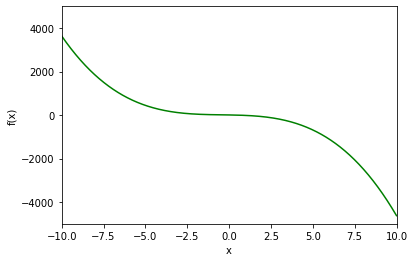

In [25]:
dots = np.linspace(-10, 10, 1000)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

plt.plot(dots, f(dots), color='g');

In [26]:
x_datas = []
f_datas = []

for i in range(10):
    x_data = np.random.uniform(-10, 10, 20)
    x_datas.append(x_data)
    f_datas.append([f(i) for i in x_data] + np.random.uniform(-500, 500, 20))

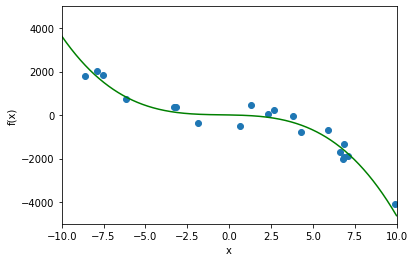

In [27]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.scatter(x_datas[1], f_datas[1]);

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

regressors = []
bias_tree, variance_tree = [], []
mse_train = []

for i in range(10):
    # создадим модель
    regressor = DecisionTreeRegressor(max_depth=10)
    # обучим ее
    regressor.fit(np.reshape(x_datas[i], (-1, 1)), f_datas[i])
    bias_tree.append(mse(f_datas[i], regressor.predict(np.reshape(x_datas[i], (-1, 1)))))
                    
    regressors.append(regressor)

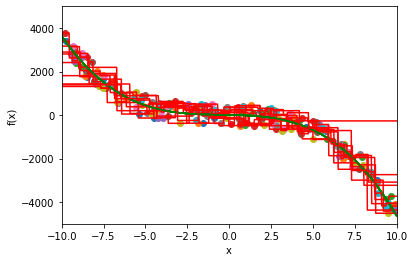

In [29]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

predictions = []
for i in range(10):
    plt.plot(dots, f(dots), color='g')
    plt.scatter(x_datas[i], f_datas[i])
    
    prediction = regressors[i].predict(np.reshape(dots, (-1, 1)))
    predictions.append(prediction)
    variance_tree.append(mse(f(dots), prediction).mean() - bias_tree[i].mean())
    
    plt.plot(dots, prediction, color='r');
predictions = np.array(predictions)

In [30]:
mean_prediction = np.mean(predictions, axis=0)

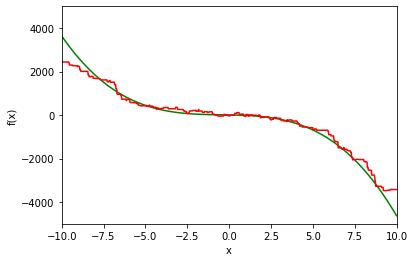

In [31]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.plot(dots, mean_prediction, color='r');

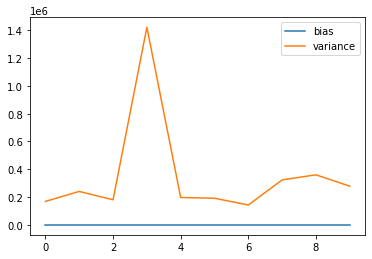

In [32]:
plt.plot(range(10), bias_tree, label='bias')
plt.plot(range(10), variance_tree, label='variance')
plt.legend();

**Прдемонстрируем высокое смещение (bias) и низкий разброс (variance)**

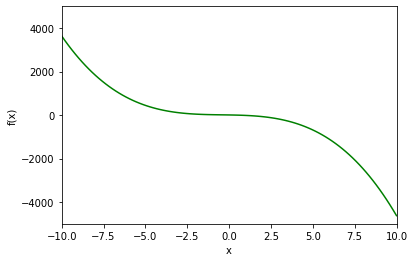

In [33]:
dots = np.linspace(-10, 10, 100)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g');

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

regressors = []
bias_lr, variance_lr = [], []

for i in range(10):
    # создадим модель
    regressor = LinearRegression()
    
    # обучим ее
    regressor.fit(np.reshape(x_datas[i], (-1, 1)), f_datas[i])
    bias_lr.append(mse(f_datas[i], regressor.predict(np.reshape(x_datas[i], (-1, 1)))))

    regressors.append(regressor)

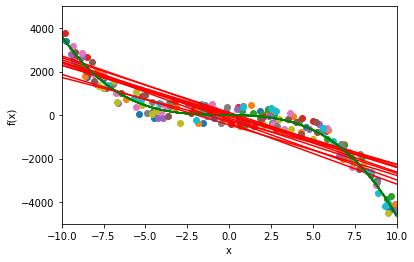

In [35]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10, 10)

predictions = []
for i in range(10):
    plt.plot(dots, f(dots), color='g')
    plt.scatter(x_datas[i], f_datas[i])
    
    prediction = regressors[i].predict(np.reshape(dots, (-1, 1)))
    predictions.append(prediction)
    variance_lr.append(mse(f(dots), prediction).mean() - bias_lr[i].mean())
    
    plt.plot(dots, prediction, color='r');
predictions = np.array(predictions)

In [36]:
mean_prediction = np.mean(predictions, axis=0)

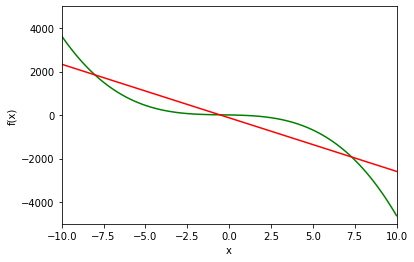

In [37]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-5000, 5000)
plt.xlim(-10,10)

plt.plot(dots, f(dots), color='g')
plt.plot(dots, mean_prediction, color='r');

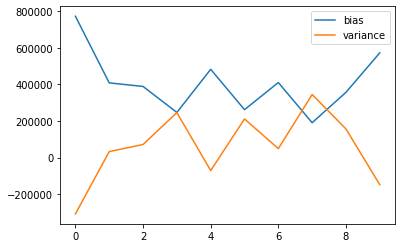

In [38]:
plt.plot(range(10), bias_lr, label='bias')
plt.plot(range(10), variance_lr, label='variance')
plt.legend();

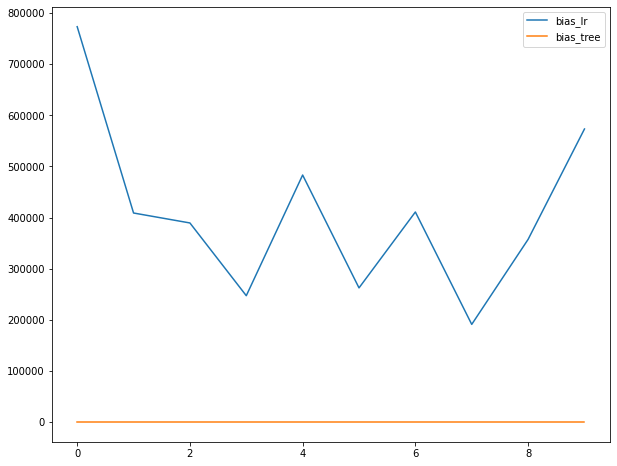

In [39]:
plt.figure(figsize=(10, 8))
plt.plot(range(10), bias_lr, label='bias_lr')
plt.plot(range(10), bias_tree, label='bias_tree')

plt.legend();

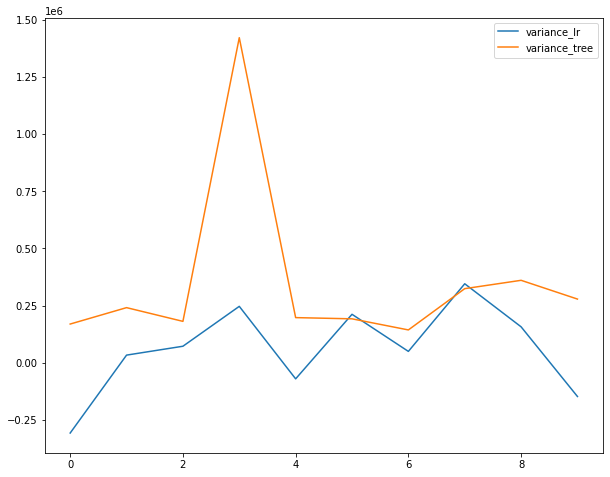

In [40]:
plt.figure(figsize=(10, 8))
plt.plot(range(10), variance_lr, label='variance_lr')
plt.plot(range(10), variance_tree, label='variance_tree')

plt.legend();